In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [161]:
seed =11
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,3000,0.1)
K = 4.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

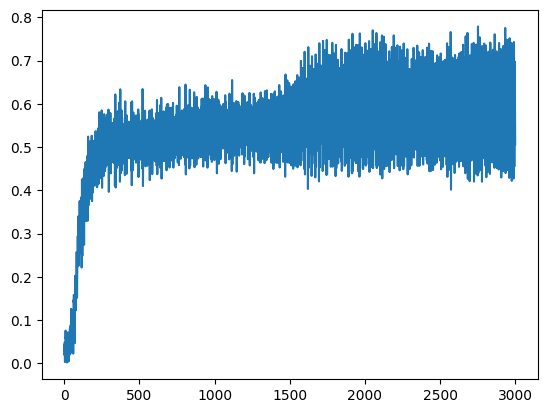

In [162]:
plt.plot(t,rs)

In [163]:
arg = np.argsort(avg_dtheta[-1])

In [164]:
def get_group_index(data_):
    diff_dtheta = np.diff(data_)
    peaks, _ = find_peaks(diff_dtheta, height=0.05)
    diff_peaks = np.diff(peaks)
    temp = np.array([False, *np.where(diff_peaks>5,True,False)])
    New_peaks = peaks[temp]
    New_diff_peaks = [0,*np.diff(New_peaks)]
    idx_max = np.argmax(New_diff_peaks)
    if idx_max == len(New_diff_peaks)-1:
        return np.array([0,0,0,0])
    elif len(New_peaks)>4:
        Groups = idx_max + np.array([-2,-1,0,1])
        temp_G = New_peaks[Groups]
        if np.argmax(np.diff(temp_G))!=1:
            Groups = idx_max + np.array([-1,0,1,2])
            temp_G = New_peaks[Groups]
        group_index = temp_G
    elif len(New_peaks)==4:
        group_index = New_peaks
    elif len(New_peaks)>2:
        Groups = idx_max + np.array([-1,0,1])
        temp_G = New_peaks[Groups]
        temp = np.argmax([0,*np.diff(temp_G)])
        A_,B_ = temp_G[temp-1],temp_G[temp]
        group_index = np.array([A_,A_,B_,B_])
    else: 
        group_index = np.array([0,0,0,0])
    return group_index

In [165]:
def get_groups(dtheta,sum_time=500):
    dtheta_c = np.cumsum(dtheta,axis=0)
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
    num_data = []
    omega_data = []
    for data in avg_dtheta[-500:]:
        diff_dtheta = np.diff(np.sort(data))
        peaks, _ = find_peaks(diff_dtheta, height=0.01)
        num_data.append(np.diff(peaks))
    groups = []
    N = len(dtheta[-1])
    for diff in num_data:
        sort_re = np.sort(diff)[::-1]
        temp = []
        for i in sort_re[:5]:
            temp.append(i)
        if len(sort_re) == 0:
            temp = [N,0,0,0,0]
        else:
            for i in range(5- len(sort_re)):
                temp.append(0)
        groups.append(temp)
    return groups

In [166]:
get_groups(dtheta)

[[319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 42, 26, 10],
 [319, 45, 41, 26, 10],
 [319, 45, 41, 26, 10],
 [319, 45, 41, 26, 10],
 [319, 45, 41, 2

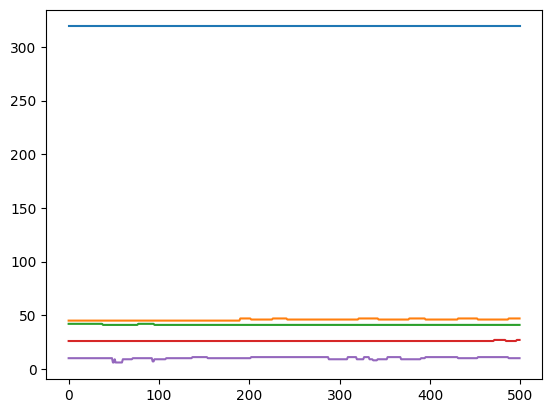

In [167]:
plt.plot(get_groups(dtheta))

In [168]:
groups = []

for i,D in enumerate(avg_dtheta):
    temp = get_group_index(np.sort(D))
    groups.append(temp)

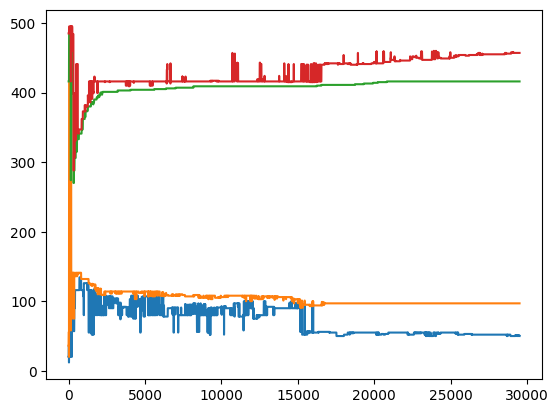

In [169]:
plt.plot(groups)

In [170]:
### 교통 데이터 , pocker plank equation 읽어보기

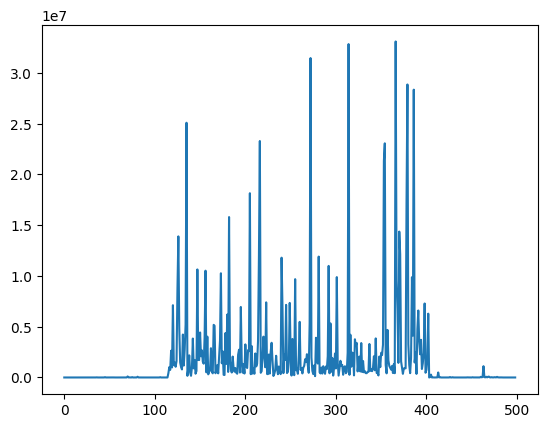

In [171]:
plt.plot(1/diff_dtheta)
# plt.ylim(0,200)

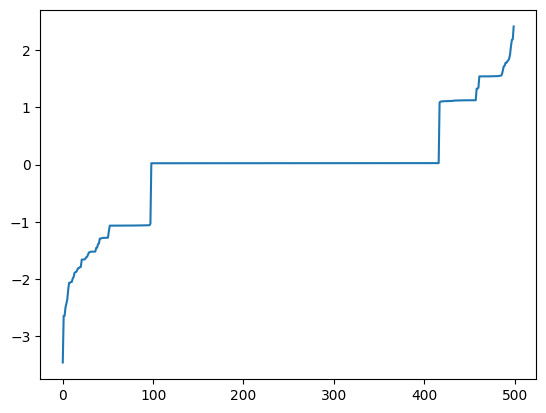

In [172]:
plt.plot(np.sort(avg_dtheta[-1]))

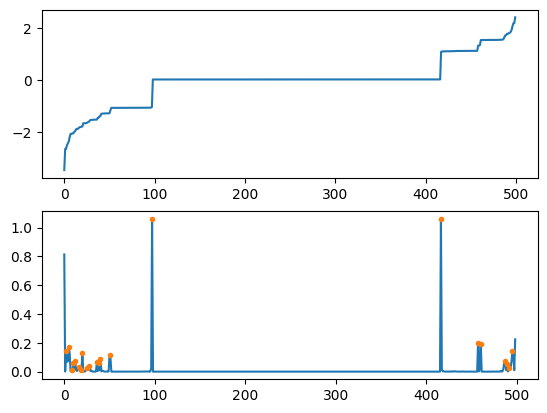

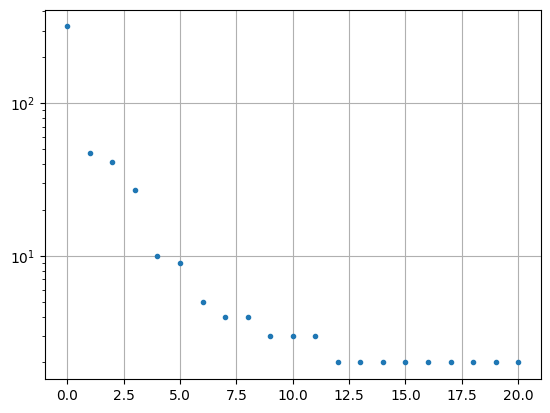

In [173]:
plt.subplot(211)
index = -1
plt.plot(np.sort(avg_dtheta[index]))
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff(np.sort(avg_dtheta[index]))

plt.plot(diff_dtheta)
peaks, _ = find_peaks(diff_dtheta, height=0.01)
max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
# plt.yscale('log')

# plt.ylim(0,10)

plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
plt.yscale('log')
plt.grid()

In [160]:
print(max_s)

[0.76747385 0.6987313 ]


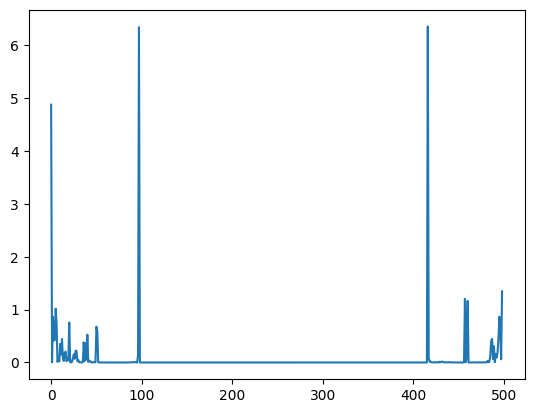

In [174]:
plt.plot(6*np.diff(avg_dtheta[-1,arg]))

In [ ]:
peaks1, _ = find_peaks(diff1, height=0.005)
plt.plot(peaks1, diff1[peaks1], "X",label='peaks 1',markersize=6,color='tab:orange')

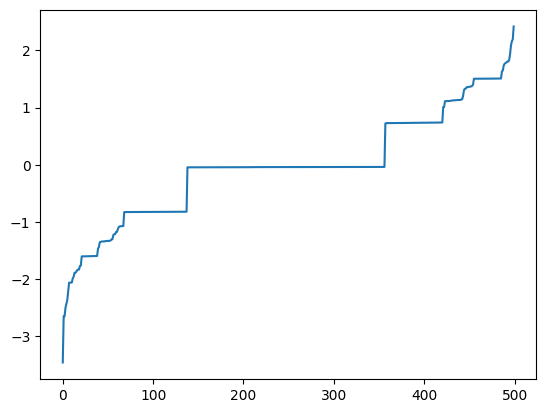

In [15]:
plt.plot(avg_dtheta[-1,arg])